In [88]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [127]:
#Read xmap file into dataframe and trasfer relevant arguments to bedfile
xmap=pd.read_csv(r"C:\Users\Assaf\Documents\postdoctoral TAU\XMAPFILE.xmap", sep='\t', header=None, skiprows=8)
xmap.columns = xmap.iloc[0]
xmap.head(10)
xmap.dtypes
xmapr=xmap.iloc[2:]
xmapr.head()
bedtable=xmapr[['RefContigID','RefStartPos', 'RefEndPos','Orientation']]
bedtable['RefContigID']=("chr"+ bedtable['RefContigID'])
bedtable['RefStartPos']=bedtable['RefStartPos'].astype(float)
bedtable['RefEndPos']=bedtable['RefEndPos'].astype(float)
bedtable['RefEndPos']=bedtable['RefEndPos'].astype(int)
bedtable['RefStartPos']=bedtable['RefStartPos'].astype(int)
bedtable['RefContigID']=bedtable['RefContigID'].replace({'chr23':'chrX', 'chr24':'chrY' })
bedtable.to_csv(r"C:\Users\Assaf\Documents\postdoctoral TAU\xmap3.bed", index=False, header=False, sep='\t')


In [136]:
#Group bedgrapph by coverage values to generate histogram 
his=pd.read_csv(r"C:\Users\Assaf\Documents\postdoctoral TAU\xmap.bedgraph",names=["chr", "Start", "End", "Coverage"], sep='\t')
his['lenght']=(his['End']-his['Start'])
f=his.groupby(['Coverage'])['lenght'].sum()

In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

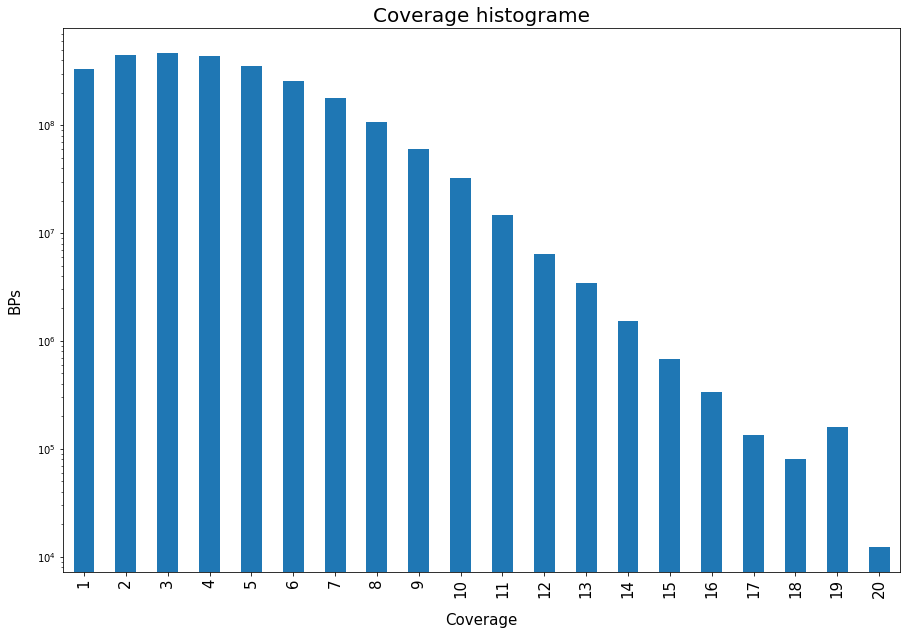

In [163]:
#Plot number of bp per coverage value histogram
f.plot(kind='bar', figsize=(15, 10))

plt.xlabel('Coverage', fontsize=15, labelpad=15) # add to x-label to the plot
plt.ylabel('BPs', fontsize=15, labelpad=15) # add y-label to the plot
plt.rc('xtick', labelsize=15)
plt.title('Coverage histograme', fontsize=20) # add title to the plot
plt.yscale('log')
#plt.show()
plt.savefig(r"C:\Users\Assaf\Documents\postdoctoral TAU\xmapfig.jpg")